In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [66]:
data = pd.read_csv('/content/tweet_emotions.csv')

In [67]:
pd.set_option('max_colwidth', 140)

In [68]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [69]:
data.drop('tweet_id', axis =1, inplace=True)

In [70]:
data.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,sadness,Layin n bed with a headache ughhhh...waitin on your call...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [71]:
data.value_counts('sentiment')

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
dtype: int64

In [72]:
data.isnull().sum()

sentiment    0
content      0
dtype: int64

In [73]:
#data['sentiment'] = data['sentiment'].replace({'neutral':0, 'happiness':1,'love':2,'fun':3, 'surprise':4, 'sadness':5, 'worry':6, 'relief':7, 'hate':8, 'empty':9, 'enthusiasm':10, 'boredom':11, 'anger':12 })

In [74]:
# Label encoding sentiment column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sentiment'] = le.fit_transform(data['sentiment'])

In [75]:
data.head()

,sentiment,content
0,2,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,10,Layin n bed with a headache ughhhh...waitin on your call...
2,10,Funeral ceremony...gloomy friday...
3,3,wants to hang out with friends SOON!
4,8,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [76]:
import string
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
def remove_punctuations(text):
  punctuation_free = ''.join([i for i in text if i not in string.punctuation])
  #replacing url's from the text
  output_text = re.sub(r'http\S+','',punctuation_free)
  return output_text

In [78]:
def tokenization(text):
  tokens = nltk.word_tokenize(text)
  return tokens

In [79]:
stop_words = nltk.corpus.stopwords.words('english')
def remove_stop_words(text):
  text_without_stop_words = [i for i in text if i not in stop_words]
  return text_without_stop_words

In [80]:
from nltk.stem import WordNetLemmatizer
wordNetLemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
  output_text = [wordNetLemmatizer.lemmatize(word) for word in text]
  return output_text

In [81]:
def preprocess(column):
  corpus = []
  for item in column:
    output_text = remove_punctuations(item)
    output_text = output_text.lower()
    output_text = tokenization(output_text)
    output_text = remove_stop_words(output_text)
    output_text = lemmatize_text(output_text)
    corpus.append(output_text)
  return corpus

In [82]:
#Adding the preprocessed text as a new column to the data df
data['tweets'] = preprocess(data['content'])

In [83]:
data.head()

,sentiment,content,tweets
0,2,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,"[tiffanylue, know, listenin, bad, habit, earlier, started, freakin, part]"
1,10,Layin n bed with a headache ughhhh...waitin on your call...,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,10,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]"
3,3,wants to hang out with friends SOON!,"[want, hang, friend, soon]"
4,8,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.","[dannycastillo, want, trade, someone, houston, ticket, one]"


In [84]:
# Splitting the df to x and y
x = data['tweets']
y = data['sentiment']


In [85]:
# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [86]:
import gensim
# creating Word2Vec model
word2vec_model = gensim.models.Word2Vec(x_train, min_count=1)

#assigning the words to word variable from the word2vec
words = word2vec_model.wv.index_to_key

#assigning the vectors for each word in the train and test set
train_vec = np.array([np.array(word2vec_model.wv[i] for i in item if i in words) for item in x_train], dtype=object)
test_vec = np.array([np.array(word2vec_model.wv[i] for i in item if i in words) for item in x_test], dtype=object)

In [87]:
train_vec.ndim

1

In [88]:
x_train_vec_avg = [np.mean(v, axis=0) if v.ndim > 0 and v.size > 0 else np.zeros(100, dtype=float) for v in train_vec]
x_test_vec_avg = [np.mean(v, axis=0) if v.ndim > 0 and v.size > 0 else np.zeros(100, dtype=float) for v in test_vec]


In [89]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train_vec_avg, y_train)

RandomForestClassifier()

In [90]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test_vec_avg)
accuracy_score(y_pred,y_test)

0.2175

In [91]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [92]:
!pip install unidecode

In [93]:
import unidecode

In [94]:
def clean_text(text):
    #Removing URLs
    text = re.sub('((www.[^s]+)|(https?:\/\/.*?[\s+]))',' ', text)
    #Removing mentions
    text = re.sub('@[\w]*',' ', text)

    # Remove special characters and numbers
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r',+', ', ', text)
    text = re.sub(r'[^A-Za-zÀ-ú ]+', '', text)
    # Convert to lower case
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    text = unidecode.unidecode(text)  # removing accents
    return text

In [95]:
from nltk.corpus import stopwords
def remove_stopwords(texto):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(texto.lower())
    return " ".join([token for token in tokens if token not in stop_words])

In [98]:
wordNetLemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    text= ' '.join([wordNetLemmatizer.lemmatize(word) for word in text.split()])
    return text

In [99]:
data['content_clean'] = data['content'].apply(clean_text)
data['content_clean'] = data['content_clean'].apply(remove_stopwords)
data['content_clean'] = data['content_clean'].apply(lemmatizer)

In [100]:
data.head()

,sentiment,content,tweets,content_clean
0,2,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,"[tiffanylue, know, listenin, bad, habit, earlier, started, freakin, part]",know listenin bad habit earlier started freakin part
1,10,Layin n bed with a headache ughhhh...waitin on your call...,"[layin, n, bed, headache, ughhhhwaitin, call]",layin n bed headache ughhhh waitin call
2,10,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]",funeral ceremony gloomy friday
3,3,wants to hang out with friends SOON!,"[want, hang, friend, soon]",want hang friend soon
4,8,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.","[dannycastillo, want, trade, someone, houston, ticket, one]",want trade someone houston ticket one


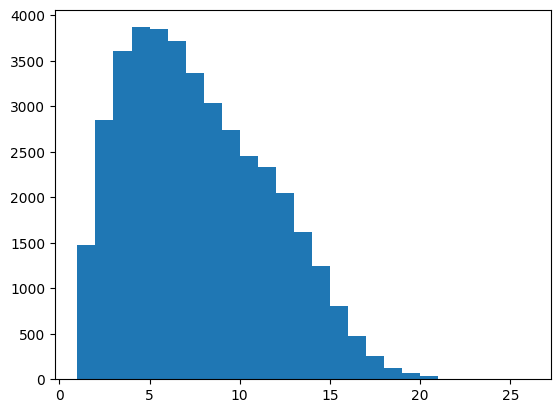

In [102]:
# feature extraction
lengths = [len(t.split(' ')) for t in data['content_clean']]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [103]:
maxlen = 20
vocab_size = 30000  # total number of word count was found to be just above 30000


In [105]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="")   # initialize tokenizer with an out of vocabulary token
tokenizer.fit_on_texts(data['content_clean'])  # fit on the cleaned tweets data

word_index = tokenizer.word_index
vocab_size = len(word_index)

In [106]:
def get_seqeuences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)  # converting each sentence to tokenized numeric sequences
  padded = pad_sequences(sequences, truncating="post", padding="post", maxlen=maxlen) # post padding- fill with zeroes to the end & post truncate would truncate larger than maxlen at the end
  return padded

In [107]:
padded_tweets = get_seqeuences(tokenizer, data['content_clean'])

In [109]:
x_train, x_test, y_train, y_test = train_test_split(padded_tweets, data['sentiment'], test_size=0.2, random_state=134) #splitting train and test data with 80:20 ratio


In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, GlobalAveragePooling1D, Flatten, Dropout
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [112]:
emotion_count = data['sentiment'].nunique()

In [113]:
model = Sequential()  # model with layers added sequentially
model.add(Embedding(vocab_size, 16, input_length = maxlen, embeddings_regularizer=l2(0.01)))
model.add(Bidirectional(LSTM(20, return_sequences=True)))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(32, activation = "relu", kernel_regularizer=l2(0.02)))
model.add(Dropout(0.5))      # dropout layer to prevent overfitting
model.add(Dense(emotion_count, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            481712    
                                                                 
 bidirectional (Bidirection  (None, 20, 40)            5920      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 32)                1312      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 13)                4

In [114]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)])

Epoch 1/50
1000/1000 [==============================] - 46s 34ms/step - loss: 2.3483 - accuracy: 0.2141 - val_loss: 2.1474 - val_accuracy: 0.2520
Epoch 2/50
1000/1000 [==============================] - 32s 32ms/step - loss: 2.1780 - accuracy: 0.2357 - val_loss: 2.1680 - val_accuracy: 0.2475
Epoch 3/50
1000/1000 [==============================] - 34s 34ms/step - loss: 2.1811 - accuracy: 0.2352 - val_loss: 2.1315 - val_accuracy: 0.2556
Epoch 4/50
1000/1000 [==============================] - 32s 32ms/step - loss: 2.1471 - accuracy: 0.2515 - val_loss: 2.0899 - val_accuracy: 0.2943
Epoch 5/50
1000/1000 [==============================] - 35s 35ms/step - loss: 2.1143 - accuracy: 0.2793 - val_loss: 2.0869 - val_accuracy: 0.2869
Epoch 6/50
1000/1000 [==============================] - 32s 32ms/step - loss: 2.0949 - accuracy: 0.2924 - val_loss: 2.0500 - val_accuracy: 0.3139
Epoch 7/50
1000/1000 [==============================] - 31s 31ms/step - loss: 2.0746 - accuracy: 0.2939 - val_loss: 2.0368 -

In [115]:
score = model.evaluate(x_test, y_test)[1]


250/250 [==============================] - 4s 17ms/step - loss: 2.0218 - accuracy: 0.3322
Accuracy score in percentage : 33.22%


In [116]:
print("Accuracy score in percentage : ", round(score * 100, 2), "%")

Accuracy score in percentage :  33.22 %
